Mounting drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading datasets

In [2]:
import numpy as np
train_X = np.load("/content/drive/MyDrive/MLCoursework/train_x.npy", allow_pickle=True)
train_y = np.load("/content/drive/MyDrive/MLCoursework/train_y.npy", allow_pickle=True)
validate_X = np.load("/content/drive/MyDrive/MLCoursework/valid_x.npy", allow_pickle=True)
validate_y = np.load("/content/drive/MyDrive/MLCoursework/valid_y.npy", allow_pickle=True)
test_x = np.load("/content/drive/MyDrive/MLCoursework/test_x.npy", allow_pickle=True)
test_y = np.load("/content/drive/MyDrive/MLCoursework/test_y.npy", allow_pickle=True)

In [3]:
train_X.shape

(45000, 3, 28, 28)

View.ipynb viewing functions

In [4]:
import matplotlib.pyplot as plt

def image_normalization(arr):
    return (arr - arr.min())/(arr.max()-arr.min())

def disable_ax_ticks(ax):
    ax.set_xticks([])
    ax.set_xticks([], minor=True)
    ax.set_yticks([])
    ax.set_yticks([], minor=True)

def show_mnist_examples(x, y):
    fig = plt.figure(constrained_layout=True,figsize=(12,9), dpi=100)
    gs = fig.add_gridspec(3,4)
    main_ax = fig.add_subplot(gs[:3,:3])
    fig.suptitle(y)
    #main_ax.imshow(np.moveaxis(x, 0, -1))# .imshow(x)
    main_ax.imshow(image_normalization(np.moveaxis(x, 0, -1)))
    disable_ax_ticks(main_ax)

    for j in range(3):
      c_ax = fig.add_subplot(gs[j,-1])
      subimage = x.copy()
      subimage[:j] = 0
      subimage[j+1:] = 0
      subimage[j] = subimage[j]-subimage[j].min()
      c_ax.imshow(image_normalization(np.moveaxis(subimage, 0, -1)))
      disable_ax_ticks(c_ax)
    plt.show()

importing ML libraries

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow

Constants

In [6]:
num_class = 10
input_shape = (28, 28, 1)

# Loading dataset
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Pre-processing 

In [7]:
# Normalising data from 0-255 to 0-1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# One hot encodes target feature
y_train = keras.utils.to_categorical(y_train, num_class)
y_test = keras.utils.to_categorical(y_test, num_class)

Building model

In [8]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_class, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


Compiling and fitting model

In [9]:
batch_size = 128
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.3119 - accuracy: 0.9106 - val_loss: 0.1524 - val_accuracy: 0.9563
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1296 - accuracy: 0.9618 - val_loss: 0.1051 - val_accuracy: 0.9673
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0910 - accuracy: 0.9724 - val_loss: 0.0920 - val_accuracy: 0.9711
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0686 - accuracy: 0.9786 - val_loss: 0.0768 - val_accuracy: 0.9761
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0538 - accuracy: 0.9832 - val_loss: 0.0766 - val_accuracy: 0.9769
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0437 - accuracy: 0.9869 - val_loss: 0.0816 - val_accuracy: 0.9740
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0365 - accuracy: 0.9886 - val_loss: 0.0738 - val_accuracy: 0.9766
Epoch 

Plotting model loss 

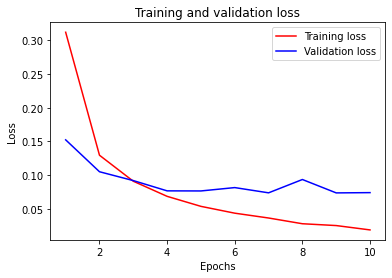

In [10]:
import matplotlib.pyplot as plt

# Gets training history 
history_dict = history.history

#Retrieves values
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Sets x tick values 
epochs = range(1, len(loss_values) + 1)

#Plots data
plt.plot(epochs, loss_values, 'r', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 

#labels

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plotting model accuracy

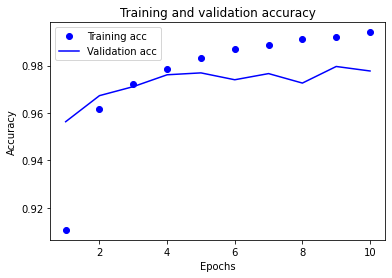

In [11]:
plt.clf()
# Retrieves values
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Plots data
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

#labels
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

F1 Report over dataset



In [12]:
from PIL import Image
from sklearn.metrics import classification_report
from tqdm import tqdm
import time 

t0 = time.clock()
# Change this for the amount of data to test
test_size = 300

# Converts RGB array into three monochrome arrays 
def ConvertImage(x):
  arr = []
  for j in range(3):
      subimage = x.copy()
      subimage[:j] = 0
      subimage[j+1:] = 0
      subimage[j] = subimage[j]-subimage[j].min()
      subimage = image_normalization(np.moveaxis(subimage, 0, -1))
      subimage = subimage[:,:,j]
      subimage = subimage.reshape(1, 28, 28, 1)
      arr.append(subimage.copy())
  return arr

# Converts testign dataset
Mono_test_x = []
for i in test_x:
  Mono_test_x.append(ConvertImage(i))

# Predicts final sum
final_pred = []
for i in tqdm(Mono_test_x[:test_size]):
  sum = 0 
  for j in range(3):
    sum += model.predict(i[j]).argmax()
  final_pred.append(sum-1)

# Prints classification report
print("final test classification report")
print(classification_report(test_y[:test_size], final_pred))

t1 = time.clock() - t0
print("CPU seconds: ", t1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
100%|██████████| 300/300 [00:56<00:00,  5.29it/s]

final test classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.89      0.94        19
           2       0.89      1.00      0.94         8
           3       1.00      0.94      0.97        16
           4       0.95      1.00      0.97        18
           5       1.00      0.90      0.95        10
           6       0.93      1.00      0.96        13
           7       0.93      1.00      0.97        14
           8       0.93      0.93      0.93        15
           9       1.00      0.80      0.89        10
          10       1.00      0.90      0.95        21
          11       0.79      0.88      0.83        17
          12       0.82      1.00      0.90        14
          13       0.91      1.00      0.95        20
          14       1.00      0.89      0.94        19
          15       1.00      1.00      1.00        14
          16       0.89      0.84      0.86     


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: time.

Random example prediction

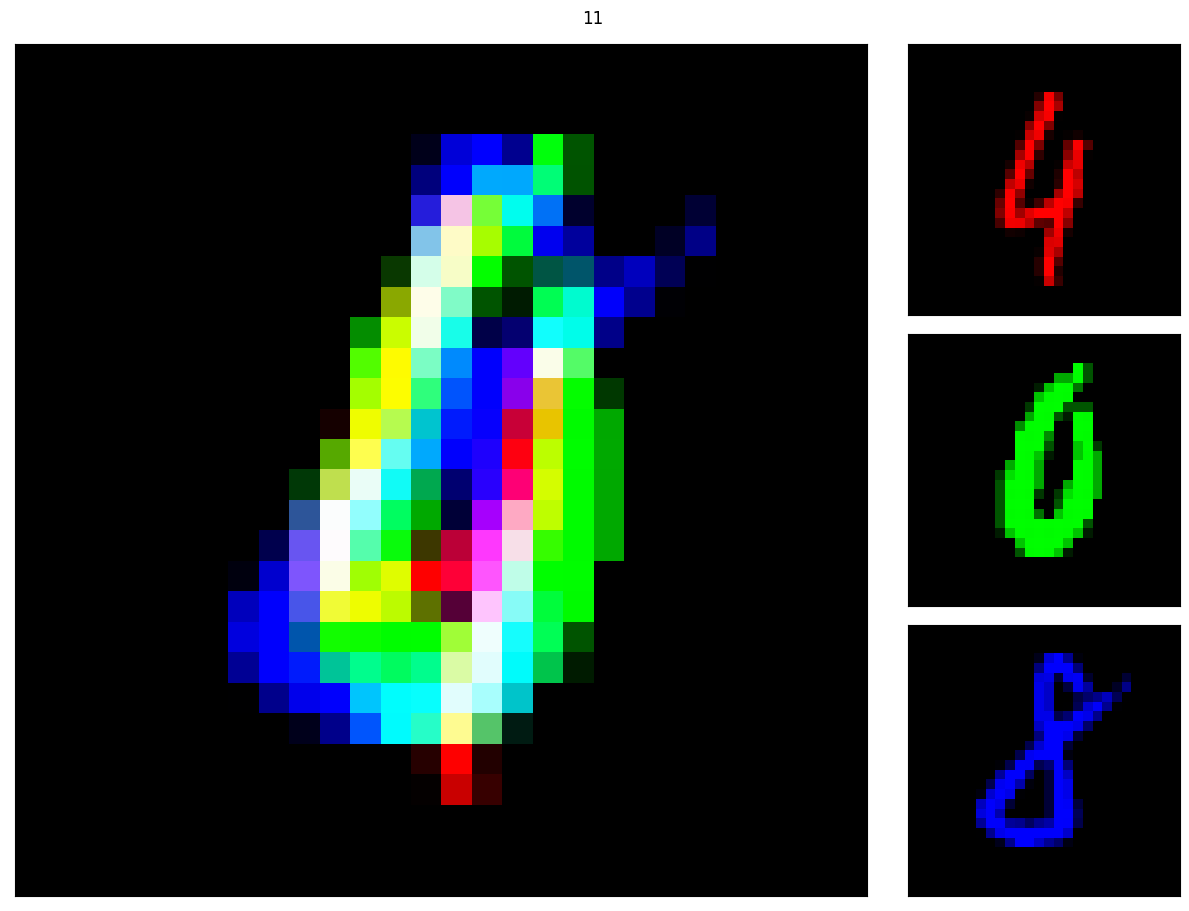

red  model prediction:  9
green  model prediction:  0
blue  model prediction:  8
Final prediction:  16


In [13]:
import random 
# Gets size of dataset
count = train_X.shape[0]

# retrieves random image
ri = random.randrange(count)
random_image = train_X[ri]

# Shows random image
show_mnist_examples(random_image, train_y[ri])

# Calculated final sum 
conv_img = ConvertImage(random_image)
labels = ['red', 'green', 'blue']
sum = 0
for i in range(3):
    num_pred = model.predict(conv_img[i]).argmax()
    print(labels[i], " model prediction: ", num_pred)
    sum += num_pred
sum-=1
print("Final prediction: ", sum)

